<a href="https://colab.research.google.com/github/rakeshgovindsuresh/Python-Practice/blob/main/dbscan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
file_path ='/Alandur_Bus_Depot_Chennai-2017-2022.csv'
Raw_DataFrame_1 = pd.read_csv(file_path)
Raw_DataFrame_1.describe()

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
count,52327.000000,22808.000000,53544.000000,53682.000000,53958.000000,22047.000000,53566.000000,46800.000000,53496.000000,54029.000000,...,17414.000000,0.0,42264.000000,55553.000000,55571.000000,0.0,0.0,53960.000000,55642.000000,30656.000000
mean,42.480908,65.495499,8.742953,21.905022,28.302401,18.250520,10.635921,1.033906,25.390660,0.363611,...,0.648413,NaN,72.503735,1.212904,173.255393,NaN,NaN,73.743630,795.242254,-0.117526
std,57.528978,46.728101,12.886552,25.627300,32.466489,14.297003,12.165927,0.891978,26.768571,1.737678,...,1.016877,NaN,14.971776,1.680335,96.651376,NaN,NaN,146.659191,92.550181,0.412476
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.000000,0.010000,0.000000,...,0.010000,NaN,1.900000,0.010000,0.050000,NaN,NaN,0.000000,740.340000,-0.980000
25%,19.690000,38.980000,3.160000,9.930000,10.580000,10.260000,3.473125,0.570000,9.140000,0.000000,...,0.280000,NaN,61.460000,0.430000,94.502500,NaN,NaN,2.250000,752.400625,-0.500000
50%,32.650000,56.450000,4.990000,13.940000,18.020000,15.000000,6.450000,0.730000,16.400000,0.000000,...,0.345000,NaN,73.670000,0.970000,181.310000,NaN,NaN,7.880000,757.370000,-0.440000
75%,50.040000,79.356875,9.538125,24.371875,32.954375,22.440000,13.520000,1.230000,32.890000,0.357500,...,0.792500,NaN,83.440000,1.477500,251.725000,NaN,NaN,71.902500,762.380000,0.360000
max,999.990000,980.160000,404.350000,458.910000,466.180000,317.080000,187.540000,24.220000,199.470000,240.800000,...,33.330000,NaN,100.000000,46.570000,359.700000,NaN,NaN,998.470000,1022.750000,0.720000


In [ ]:
ms = Raw_DataFrame_1.isnull().sum()
ms_percentage = (Raw_DataFrame_1.isnull().sum()/(len(Raw_DataFrame_1)))*100
Missing_Data_Info = pd.DataFrame({'Total Missings': ms, 'Percentage': ms_percentage})
print(Missing_Data_Info)


                     Total Missings  Percentage
Timestamp                         0    0.000000
PM2.5 (µg/m³)                  9017   14.699074
PM10 (µg/m³)                  38536   62.819510
NO (µg/m³)                     7800   12.715180
NO2 (µg/m³)                    7662   12.490219
NOx (ppb)                      7386   12.040297
NH3 (µg/m³)                   39297   64.060055
SO2 (µg/m³)                    7778   12.679317
CO (mg/m³)                    14544   23.708920
Ozone (µg/m³)                  7848   12.793427
Benzene (µg/m³)                7315   11.924557
Toluene (µg/m³)                7323   11.937598
Xylene (µg/m³)                61344  100.000000
O Xylene (µg/m³)              59056   96.270214
Eth-Benzene (µg/m³)           39284   64.038863
MP-Xylene (µg/m³)             43930   71.612546
AT (°C)                       61344  100.000000
RH (%)                        19080   31.103286
WS (m/s)                       5791    9.440206
WD (deg)                       5773    9

In [ ]:
Raw_DataFrame_1=Raw_DataFrame_1.drop(['TOT-RF (mm)','RF (mm)','AT (°C)','O Xylene (µg/m³)','Xylene (µg/m³)'],axis=1)

In [ ]:
ms = Raw_DataFrame_1.isnull().sum()
ms_percentage = (Raw_DataFrame_1.isnull().sum()/(len(Raw_DataFrame_1)))*100
Missing_Data_Info = pd.DataFrame({'Total Missings': ms, 'Percentage': ms_percentage})
print(Missing_Data_Info)

                     Total Missings  Percentage
Timestamp                         0    0.000000
PM2.5 (µg/m³)                  9017   14.699074
PM10 (µg/m³)                  38536   62.819510
NO (µg/m³)                     7800   12.715180
NO2 (µg/m³)                    7662   12.490219
NOx (ppb)                      7386   12.040297
NH3 (µg/m³)                   39297   64.060055
SO2 (µg/m³)                    7778   12.679317
CO (mg/m³)                    14544   23.708920
Ozone (µg/m³)                  7848   12.793427
Benzene (µg/m³)                7315   11.924557
Toluene (µg/m³)                7323   11.937598
Eth-Benzene (µg/m³)           39284   64.038863
MP-Xylene (µg/m³)             43930   71.612546
RH (%)                        19080   31.103286
WS (m/s)                       5791    9.440206
WD (deg)                       5773    9.410863
SR (W/mt2)                     7384   12.037037
BP (mmHg)                      5702    9.295123
VWS (m/s)                     30688   50

In [11]:
Raw_DataFrame_1['month'] = pd.DatetimeIndex(Raw_DataFrame_1['Timestamp']).month
print(Raw_DataFrame_1['month'] )

0         1
1         1
2         1
3         1
4         1
         ..
61339    12
61340    12
61341    12
61342    12
61343    12
Name: month, Length: 61344, dtype: int32


In [12]:
for column in Raw_DataFrame_1.columns:
    if Raw_DataFrame_1[column].dtype in ['float64', 'int64']:  # Ensuring we're only imputing numeric columns
        Raw_DataFrame_1[column].fillna(Raw_DataFrame_1[column].mean(), inplace=True)
        print(Raw_DataFrame_1.isna().sum())

Timestamp                  0
PM2.5 (µg/m³)              0
PM10 (µg/m³)           38536
NO (µg/m³)              7800
NO2 (µg/m³)             7662
NOx (ppb)               7386
NH3 (µg/m³)            39297
SO2 (µg/m³)             7778
CO (mg/m³)             14544
Ozone (µg/m³)           7848
Benzene (µg/m³)         7315
Toluene (µg/m³)         7323
Xylene (µg/m³)         61344
O Xylene (µg/m³)       59056
Eth-Benzene (µg/m³)    39284
MP-Xylene (µg/m³)      43930
AT (°C)                61344
RH (%)                 19080
WS (m/s)                5791
WD (deg)                5773
RF (mm)                61344
TOT-RF (mm)            61344
SR (W/mt2)              7384
BP (mmHg)               5702
VWS (m/s)              30688
month                      0
dtype: int64
Timestamp                  0
PM2.5 (µg/m³)              0
PM10 (µg/m³)               0
NO (µg/m³)              7800
NO2 (µg/m³)             7662
NOx (ppb)               7386
NH3 (µg/m³)            39297
SO2 (µg/m³)             7778
C

In [13]:
ms = Raw_DataFrame_1.isnull().sum()
ms_percentage = (Raw_DataFrame_1.isnull().sum()/(len(Raw_DataFrame_1)))*100
new_Missing_Data_Info = pd.DataFrame({'Total Missings': ms, 'Percentage': ms_percentage})
print(new_Missing_Data_Info)

                     Total Missings  Percentage
Timestamp                         0         0.0
PM2.5 (µg/m³)                     0         0.0
PM10 (µg/m³)                      0         0.0
NO (µg/m³)                        0         0.0
NO2 (µg/m³)                       0         0.0
NOx (ppb)                         0         0.0
NH3 (µg/m³)                       0         0.0
SO2 (µg/m³)                       0         0.0
CO (mg/m³)                        0         0.0
Ozone (µg/m³)                     0         0.0
Benzene (µg/m³)                   0         0.0
Toluene (µg/m³)                   0         0.0
Xylene (µg/m³)                61344       100.0
O Xylene (µg/m³)                  0         0.0
Eth-Benzene (µg/m³)               0         0.0
MP-Xylene (µg/m³)                 0         0.0
AT (°C)                       61344       100.0
RH (%)                            0         0.0
WS (m/s)                          0         0.0
WD (deg)                          0     

In [14]:
Raw_DataFrame_1=Raw_DataFrame_1.drop(['TOT-RF (mm)','RF (mm)','AT (°C)','O Xylene (µg/m³)','Xylene (µg/m³)'],axis=1)

In [15]:
pollutants = Raw_DataFrame_1[['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)']]

In [16]:
scaler = StandardScaler()
pollutants_scaled = scaler.fit_transform(pollutants)


In [17]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(pollutants_scaled)

In [20]:
Raw_DataFrame_1['Cluster'] = clusters

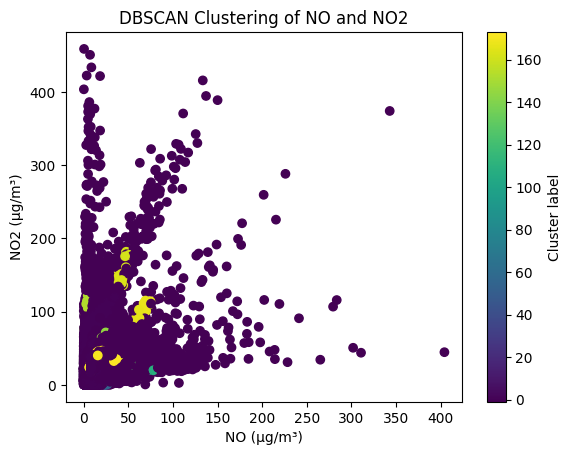

In [26]:
plt.scatter(Raw_DataFrame_1['NO (µg/m³)'], Raw_DataFrame_1['NO2 (µg/m³)'], c=Raw_DataFrame_1['Cluster'])
plt.xlabel('NO (µg/m³)')
plt.ylabel('NO2 (µg/m³)')
plt.title('DBSCAN Clustering of NO and NO2')
plt.colorbar(label='Cluster label')
plt.show()

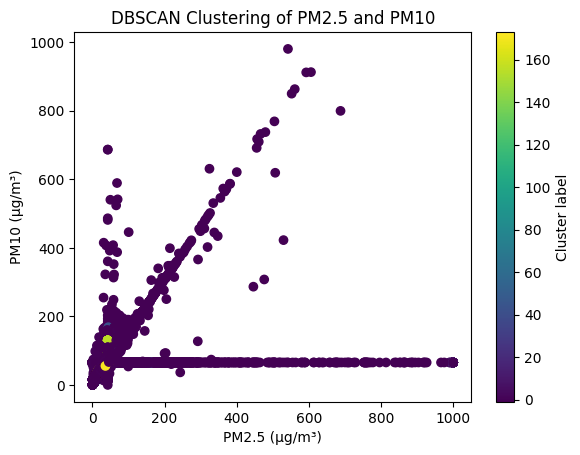

In [25]:
plt.scatter(Raw_DataFrame_1['PM2.5 (µg/m³)'], Raw_DataFrame_1['PM10 (µg/m³)'], c=Raw_DataFrame_1['Cluster'])
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('PM10 (µg/m³)')
plt.title('DBSCAN Clustering of PM2.5 and PM10')
plt.colorbar(label='Cluster label')
plt.show()

In [23]:
seasonal_patterns = Raw_DataFrame_1.groupby(['month', 'Cluster']).size().unstack(fill_value=0)
print(seasonal_patterns)

Cluster  -1     0     1     2     3     4     5     6     7     8    ...  \
month                                                                ...   
1        1435  3630     1     4     2     0     0     1     0     0  ...   
2        1081  3477     1     0     1     0     0     1     0     0  ...   
3        1009  4101     0     0     2     0     0     0     0     0  ...   
4         799  4164     0     0     0     0     1     0     0     0  ...   
5         995  4020     0     0     0     0     0     0     0     0  ...   
6         827  4126     2     1     0     0     0     1     0     0  ...   
7         732  4384     0     0     0     8     2     0     0     0  ...   
8         855  4245     0     0     0     0     0     2     0     0  ...   
9        1040  3921     0     0     0     0     0     0     6     0  ...   
10       1349  3777     1     0     1     0     2     0     0     5  ...   
11       1283  3645     0     0     0     0     0     1     0     0  ...   
12       124